# **Our Projects:**

NBA game wins prediction. We will train the model using the data from the previous NBA seasons to try to predict the wins and losses of any given team in the current season (2022).

**The Scope of Our Project:**

1. Preparing the data with steps like data cleaning, data exploration, and data engineering

2. Splitting the dataset into training set and testing set

3. Using random forest, gradient boosting, and stacking to train the model and try to improve the accuracy score

4. Displaying the predictions for any given team in the current season as well as the accuracy score of the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Checking to see how many records and features this data set contains:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/games.csv")
teams_df = pd.read_csv('/content/drive/MyDrive/teams.csv')
num_rows, num_columns = df.shape
print(f"Shape of the data: {df.shape}\n")
df

Shape of the data: (26651, 21)



,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


# **Data Prepping and Clearning:**

1. TEAM_ID_home and TEAM_ID_away represent the exact same thing the HOME_TEAM_ID and VISITOR_TEAM_ID. Performing the removal of those columns

2. Removing 'GAME_STATUS_TEXT' column since it just says FINAL in every record and we don't really need it

3. Creating two new columns that has the home_team's and away_team's abbrviations. This will help display the data better since we know the name of the team if we decide to do the analysis on any particular team

4. Handling missing values by filling them in with the mean of the respective team's attribute for that season

5. Creating two new fields called point differential and composite scores to provde more insight into the statistics for each match

6. Performing further checks on the data like range checks and outlier checks

7. Performing further data analysis

In [ ]:
# map team_id to abbreviations
team_id_to_abbreviation = dict(zip(teams_df['TEAM_ID'], teams_df['ABBREVIATION']))
df['HOME_TEAM_ABBREVIATION'] = df['HOME_TEAM_ID'].map(team_id_to_abbreviation)
df['AWAY_TEAM_ABBREVIATION'] = df['VISITOR_TEAM_ID'].map(team_id_to_abbreviation)
df.drop(columns=['TEAM_ID_home', 'TEAM_ID_away', 'GAME_STATUS_TEXT'], inplace=True)
df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_ABBREVIATION,AWAY_TEAM_ABBREVIATION
0,2022-12-22,22200477,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1,NOP,SAS
1,2022-12-22,22200478,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1,UTA,WAS
2,2022-12-21,22200466,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1,CLE,MIL
3,2022-12-21,22200467,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1,PHI,DET
4,2022-12-21,22200468,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0,ATL,CHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,1610612737,1610612740,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1,ATL,NOP
26647,2014-10-06,11400004,1610612741,1610612764,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0,CHI,WAS
26648,2014-10-06,11400005,1610612747,1610612743,2014,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1,LAL,DEN
26649,2014-10-05,11400002,1610612761,1610612758,2014,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1,TOR,SAC


In [ ]:
# identify missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
PTS_home        99
FG_PCT_home     99
FT_PCT_home     99
FG3_PCT_home    99
AST_home        99
REB_home        99
PTS_away        99
FG_PCT_away     99
FT_PCT_away     99
FG3_PCT_away    99
AST_away        99
REB_away        99
dtype: int64


# Handling missing values:

Missing values in the statistical columns will be filled with the mean of the respective team's attribute for that season. This approach ensures that any missing game statistics are replaced with a representative average, maintaining the integrity of the team and season-specific data.

 To fill missing values with the average of that team's attribute for the specific season, we need to:
 1. Identify the columns with missing values.
 2. For each such column, group the data by 'HOME_TEAM_ID' and 'SEASON' (or 'VISITOR_TEAM_ID' and 'SEASON' for away team stats), and calculate the mean.
 3. Fill the missing values in each group with the group's mean.

In [ ]:
# columns with missing values
stat_cols = [
    'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'
]

for col in stat_cols:
    # check if home or visitor, group by team/season, calculate mean of the column
    team_id_col = 'HOME_TEAM_ID' if 'home' in col else 'VISITOR_TEAM_ID'
    means = df.groupby([team_id_col, 'SEASON'])[col].transform('mean')
    df[col] = df[col].fillna(means)

check_missing = df[stat_cols].isnull().sum()
print("Missing values per column:")
check_missing

Missing values per column:


PTS_home        0
FG_PCT_home     0
FT_PCT_home     0
FG3_PCT_home    0
AST_home        0
REB_home        0
PTS_away        0
FG_PCT_away     0
FT_PCT_away     0
FG3_PCT_away    0
AST_away        0
REB_away        0
dtype: int64

Checking for duplicate rows in the dataframe


In [ ]:
duplicate_rows_count = df.duplicated().sum()
duplicate_rows_count

0

The GAME_DATE_EST column is currently in the 'object' data type. It should be converted to a datetime type for any date-related operations

In [ ]:
df['GAME_DATE_EST'] = pd.to_datetime(df['GAME_DATE_EST'])
data_type_after_conversion = df['GAME_DATE_EST'].dtype
data_type_after_conversion

dtype('<M8[ns]')

Adding point differential and composite index fields to the dataframe to provide more insight into each matchup

In [ ]:
df['Point_Differential'] = df['PTS_home'] - df['PTS_away']

# create weightage of each of the statistics, including points, field goal percentage, and assists
# weightage is used to determine composite score
weight_pts = 0.5
weight_fg_pct = 0.3
weight_ast = 0.2

# composite score using the weights and stats for each team
df['Home_Team_Composite'] = (
    (df['PTS_home'] * weight_pts) +
    (df['FG_PCT_home'] * weight_fg_pct) +
    (df['AST_home'] * weight_ast)
)

df['Away_Team_Composite'] = (
    (df['PTS_away'] * weight_pts) +
    (df['FG_PCT_away'] * weight_fg_pct) +
    (df['AST_away'] * weight_ast)
)

# Performing further checks on the data:
1. Range and Value Checks for Numerical Columns
2. Outlier Detection

In [ ]:
# checking if percentage values are valid
percentage_columns = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home',
                      'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away']
range_check = df[percentage_columns].apply(
    lambda x: (x >= 0) & (x <= 1)).all()
range_check

FG_PCT_home     True
FT_PCT_home     True
FG3_PCT_home    True
FG_PCT_away     True
FT_PCT_away     True
FG3_PCT_away    True
dtype: bool

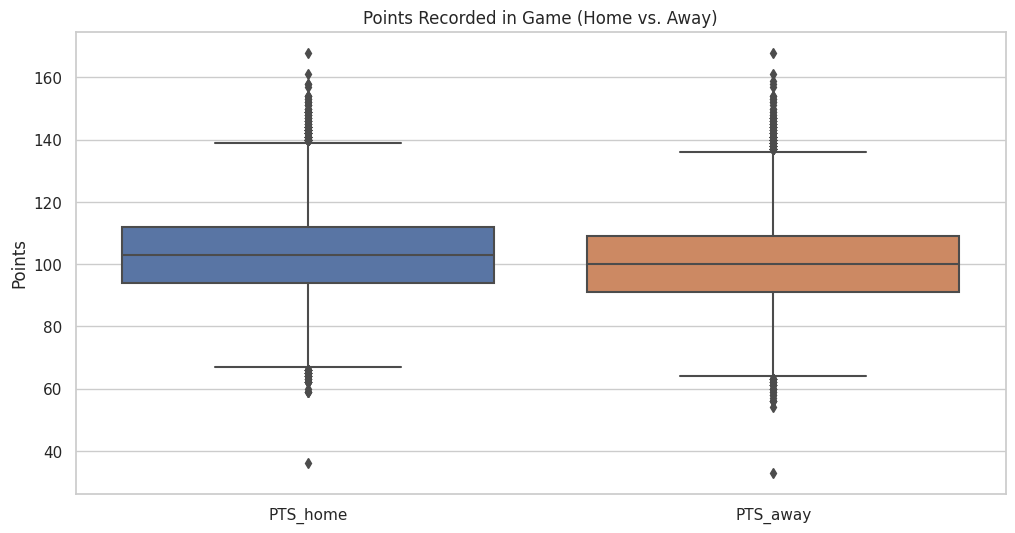

In [ ]:
# using iqr method to detect outliers
points_columns = ['PTS_home', 'PTS_away']
Q1 = df[points_columns].quantile(0.25)
Q3 = df[points_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[points_columns] < (Q1 - 1.5 * IQR)) |
 (df[points_columns] > (Q3 + 1.5 * IQR))).any()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[points_columns])
plt.title('Points Recorded in Game (Home vs. Away)')
plt.ylabel('Points')
plt.show()

**Comments**:

Range and Value Checks for Numerical Columns: All percentage columns (FG_PCT_home, FT_PCT_home, FG3_PCT_home, FG_PCT_away, FT_PCT_away, FG3_PCT_away) have values within the expected range of 0 to 1. This confirms that these fields are correctly bounded.

Outlier Detection: There are outliers detected in the points columns (PTS_home and PTS_away). This is based on the Interquartile Range (IQR) method. Outliers in sports statistics can be common due to the nature of the games. These outliers are important and connot be removed.

It appears that the data set is in good shape for analysis.

# **Data Analysis**

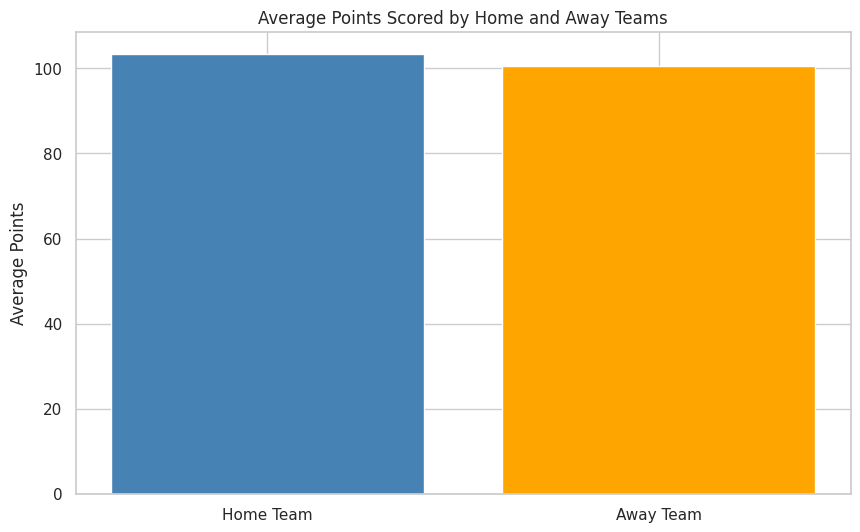

In [ ]:
# plot comparing the avg. number of points scored by home vs. away teams
avg_points_home = df['PTS_home'].mean()
avg_points_away = df['PTS_away'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Home Team', 'Away Team'], [avg_points_home, avg_points_away],
        color=['steelblue', 'orange'])
plt.title('Average Points Scored by Home and Away Teams')
plt.ylabel('Average Points')
plt.show()

**Comments**:

As depicted, the bar plot allows you to see whether there's a notable difference in scoring between teams playing at home versus those playing away. From the plot, you can observe which setting typically sees higher scoring, which might support the notion that teams tend to score more when playing at home.

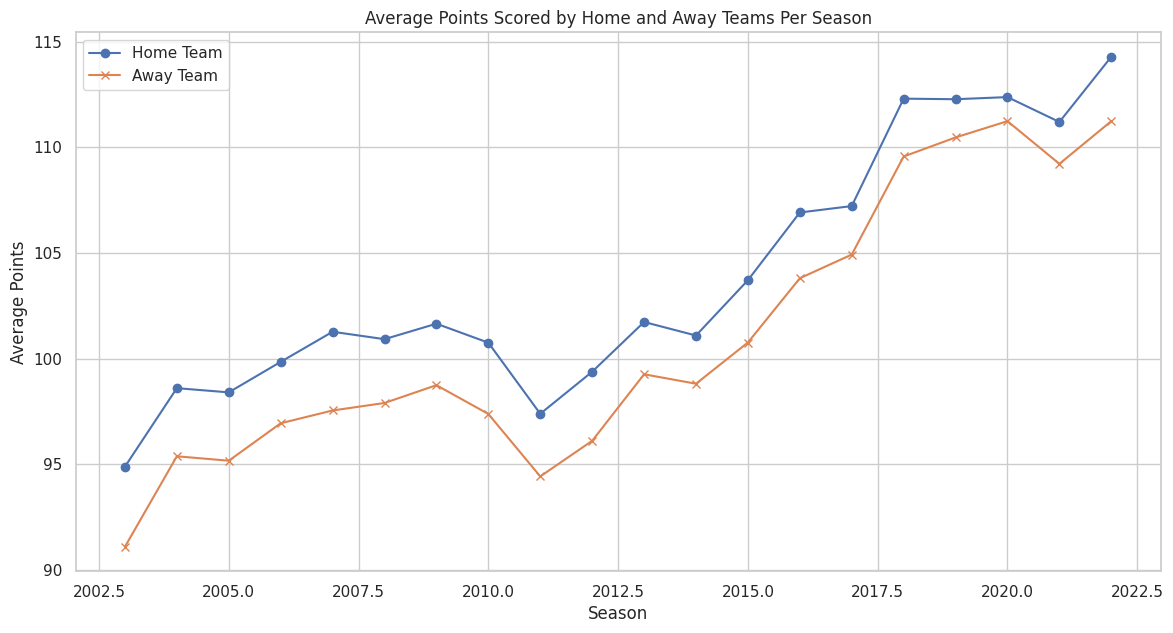

In [ ]:
# plot comparing the avg. number of points scored by home vs.
# away teams per season
avg_points_per_season = df.groupby('SEASON')[['PTS_home', 'PTS_away']].mean()
plt.figure(figsize=(14, 7))
plt.plot(avg_points_per_season.index, avg_points_per_season['PTS_home'],
         label='Home Team', marker='o')
plt.plot(avg_points_per_season.index, avg_points_per_season['PTS_away'],
         label='Away Team', marker='x')
plt.title('Average Points Scored by Home and Away Teams Per Season')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.legend()
plt.grid(True)
plt.show()

**Comments**:

The graph displays the trend of average points scored per season by home and away teams. This visualization can also offer support for the notion of home teams scoring more (or home-court advantage).

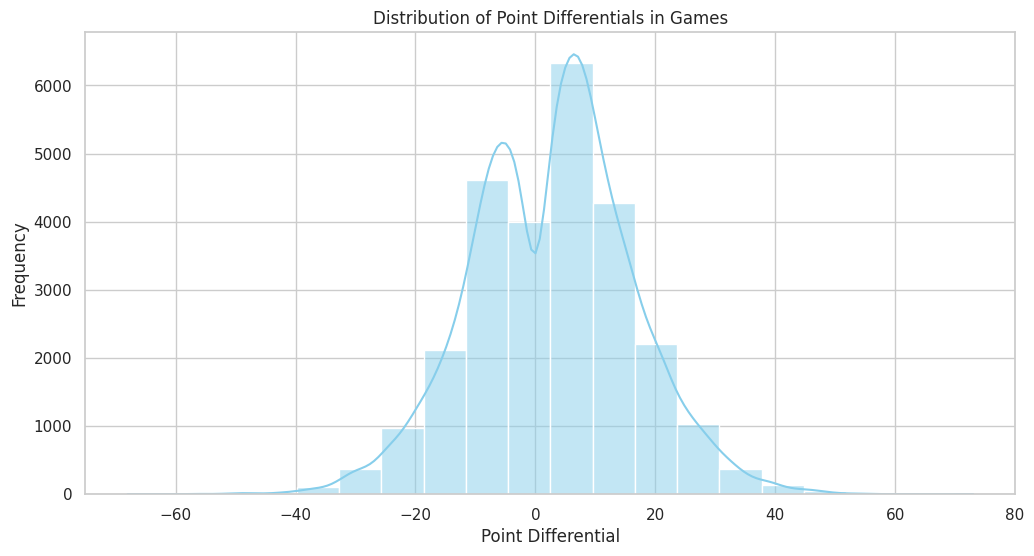

In [ ]:
sns.set(style="whitegrid")

# create a histogram to show distribution of point differentials across games
plt.figure(figsize=(12, 6))
sns.histplot(df['Point_Differential'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Point Differentials in Games')
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.show()

Comments:

This graph shows the distribution for the points differential of each game in the dataset. This helps visualize the data better, and it shows that most of the games were very close (point differential is mostly within 10 points). This also shows us that the point differential has a lot of similarities to a normal distribution.

**Normalization/Standardization**

In [ ]:
# grabbing stat columns for standardization
std_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(
    ['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS', 'SEASON'])

scaler = StandardScaler()
df[std_columns] = scaler.fit_transform(df[std_columns])
df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_ABBREVIATION,AWAY_TEAM_ABBREVIATION,Point_Differential,Home_Team_Composite,Away_Team_Composite
0,2022-12-22,22200477,1610612740,1610612759,2022,1.701074,0.412139,1.648389,0.234614,0.420254,...,0.544336,-0.260123,0.292788,0.289871,1,NOP,SAS,0.457956,1.602193,1.152141
1,2022-12-22,22200478,1610612762,1610612764,2022,1.248995,0.482829,1.907067,0.910501,-1.315347,...,0.060067,-0.150283,-0.289456,-0.783447,1,UTA,WAS,0.383873,0.946795,0.735704
2,2022-12-21,22200466,1610612739,1610612749,2022,0.796917,0.376794,0.255509,-0.387201,-0.158280,...,-0.743819,0.765046,-0.289456,0.596533,1,CLE,MIL,0.383873,0.700713,0.325740
3,2022-12-21,22200467,1610612755,1610612765,2022,0.721570,-0.347779,1.479254,-0.531390,0.805943,...,-0.230494,-0.809320,-1.259863,0.596533,1,PHI,DET,1.272875,0.767321,-0.693097
4,2022-12-21,22200468,1610612737,1610612741,2022,0.344838,-0.559849,2.384626,0.198567,-0.158280,...,0.137550,-0.525568,-0.289456,0.749864,0,ATL,CHI,-0.356962,0.288816,0.597803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,1610612737,1610612740,2014,-0.785358,-0.736574,0.603729,0.586075,0.227409,...,-1.121549,0.234155,-0.871700,0.136539,1,ATL,NOP,0.235706,-0.681279,-1.046252
26647,2014-10-06,11400004,1610612741,1610612764,2014,-1.689514,-2.168047,-0.411084,0.225603,-0.929658,...,-1.189347,-0.754400,-0.871700,0.749864,0,CHI,WAS,-0.505129,-1.667941,-1.179846
26648,2014-10-06,11400005,1610612747,1610612743,2014,-0.408626,-0.224071,-0.779203,1.298009,1.191632,...,-0.966583,1.378316,-0.483538,0.136539,1,LAL,DEN,0.013455,-0.202077,-0.449540
26649,2014-10-05,11400002,1610612761,1610612758,2014,-0.333279,-0.365451,0.106271,-0.206965,-0.351124,...,-0.327348,0.325688,-0.677619,0.443202,1,TOR,SAC,0.161622,-0.352638,-0.541004


**Splitting the dataset into training set and testing set**

The function iterates through the seasons, starting from the start index.
For each season, it creates a training set (train) consisting of all data from seasons before the current season and a test set (test) consisting of data from the current season.
The model is trained on the training set and then used to make predictions on the test set.
Predictions are combined with the actual target values from the test set, and the results are stored.

Ex: let's say seasons [2011,2012,2013,2014] is our dataset. If we set start at index 2, then our training sets are 2011,2012 and our testing set is 2013. In the next iteration, our training set are 2011,2012,2013 and test set is 2014


In [ ]:
def backtest(data, model, predictors, target):
    all_predictions = []
    accuracy_scores = []

    seasons = sorted(data["SEASON"].unique())
    for i in range(2, len(seasons)):
        season = seasons[i]
        # aggregate seasons for train/test data
        train_data = data[data["SEASON"] < season]
        test_data = data[data["SEASON"] == season]

        # train the current model on the split data
        model.fit(train_data[predictors], train_data[target])
        predictions = model.predict(test_data[predictors])
        predictions = pd.Series(predictions, index = test_data.index)
        combined = pd.concat([test_data[target], predictions], axis = 1)
        combined.columns = ["actual", "prediction"]

        accuracy = accuracy_score(combined['actual'], combined['prediction'])
        accuracy_scores.append((season, accuracy))

        all_predictions.append(combined)

    return pd.concat(all_predictions), accuracy_scores

# Training the model

**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
target = 'HOME_TEAM_WINS'
features = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'PTS_away', 'FG_PCT_away',
            'FT_PCT_away']

backtest_results, accuracies = backtest(df, rf, features, target)

# getting accuracy over aggregated season test sets
average_accuracy = sum(accuracy for season, accuracy in accuracies) / len(accuracies)

print(f"Average Random Forest Accuracy: {average_accuracy}")

Average Random Forest Accuracy: 0.9895431300946842


**Gradient Boosting Classifier**

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
features = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
              'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']

backtest_results, accuracies = backtest(df, gb_model, features, target)

average_accuracy = sum(accuracy for season, accuracy in accuracies) / len(accuracies)

print(f"Average Gradient Boosting Accuracy: {average_accuracy}")

Average Gradient Boosting Accuracy: 0.9941456687122948


**Stacking Classifer**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
stack_model = StackingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

backtest_results, accuracies = backtest(df, stack_model, features, target)

average_accuracy = sum(accuracy for season, accuracy in accuracies) / len(accuracies)

print(f"Average Stacking Accuracy: {average_accuracy}")

Average Stacking Accuracy: 0.9932866596316909


**Testing with a random team's set of games in the most recent season**

In [ ]:
most_recent_season = df['SEASON'].max()

teams_in_newest_season = df[(df['SEASON'] == most_recent_season)]['HOME_TEAM_ID'].unique()
random_team = random.choice(teams_in_newest_season)
team_games_newest_season = df[
    ((df['SEASON'] == most_recent_season) & (df['HOME_TEAM_ID'] == random_team)) |
    ((df['SEASON'] == most_recent_season) & (df['VISITOR_TEAM_ID'] == random_team))
].copy()

team_games_newest_season = pd.merge(team_games_newest_season, teams_df[['TEAM_ID', 'NICKNAME']], left_on='HOME_TEAM_ID', right_on='TEAM_ID', how='left')
team_games_newest_season.rename(columns={'NICKNAME': 'HOME_TEAM_NICKNAME'}, inplace=True)
team_games_newest_season = pd.merge(team_games_newest_season, teams_df[['TEAM_ID', 'NICKNAME']], left_on='VISITOR_TEAM_ID', right_on='TEAM_ID', how='left')
team_games_newest_season.rename(columns={'NICKNAME': 'VISITOR_TEAM_NICKNAME'}, inplace=True)
team_games_newest_season = team_games_newest_season.drop_duplicates(subset=['GAME_DATE_EST', 'HOME_TEAM_NICKNAME', 'VISITOR_TEAM_NICKNAME'], keep='first')
team_games_features = team_games_newest_season[features].apply(lambda col: le.transform(col) if col.dtype == 'object' else col)

# actual outcomes
team_games_newest_season.loc[:, 'ACTUAL_WIN'] = (
    ((team_games_newest_season['HOME_TEAM_ID'] == random_team) & (team_games_newest_season['HOME_TEAM_WINS'] == 1)) |
    ((team_games_newest_season['VISITOR_TEAM_ID'] == random_team) & (team_games_newest_season['HOME_TEAM_WINS'] == 0))
).apply(lambda x: 'W' if x else 'L')

# predictions
team_games_newest_season.loc[:, 'PREDICTED_WIN'] = stack_model.predict(team_games_features)
team_games_newest_season.loc[:, 'PREDICTED_WIN'] = team_games_newest_season['PREDICTED_WIN'].apply(lambda x: 'W' if x == 1 else 'L')

accuracy = accuracy_score(team_games_newest_season['ACTUAL_WIN'], team_games_newest_season['PREDICTED_WIN'])

# formatting to show outcomes of matches
print(f"Predictions for team ID {random_team} ({teams_df[teams_df['TEAM_ID'] == random_team]['NICKNAME'].values[0]}) in the newest season ({most_recent_season}):")
print(team_games_newest_season[['GAME_DATE_EST', 'HOME_TEAM_NICKNAME', 'VISITOR_TEAM_NICKNAME', 'PREDICTED_WIN', 'ACTUAL_WIN']].to_string(index=False))
print(f"Accuracy of predictions: {accuracy}")

Predictions for team ID 1610612755 (76ers) in the newest season (2022):
GAME_DATE_EST HOME_TEAM_NICKNAME VISITOR_TEAM_NICKNAME PREDICTED_WIN ACTUAL_WIN
   2022-12-21              76ers               Pistons             W          W
   2022-12-19              76ers               Raptors             W          W
   2022-12-16              76ers              Warriors             W          W
   2022-12-13              76ers                 Kings             W          W
   2022-12-11              76ers               Hornets             W          W
   2022-12-09              76ers                Lakers             W          W
   2022-12-05            Rockets                 76ers             W          L
   2022-12-02          Grizzlies                 76ers             W          L
   2022-11-30          Cavaliers                 76ers             W          L
   2022-11-28              76ers                 Hawks             W          W
   2022-11-27              Magic                

**Analysis of Results**

Our machine learning models (Random Forest, Gradient Boosting, and Stacking) were able to produce initial results that displayed an excellent accuracy of 98% or higher in training. However, when we went to test the models on the most recent set of NBA games, the accuracy fell to an average of 50% across multiple test runs. There are a lot of reasons as to why this decline might have come about: shifts in team dynamics over the seasons, overfitting to historical data, and data drifts are a few that are possibilities. In addition, one must acknowledge the inherent randomness/unpredictibility of outcomes in sporting matches. This can cause models to struggle with predicting consistently. Though our project scope is to analyze a single team's set of games and predict the outcomes for the team in a particular season, it might not be able to give a thorough assessment. In order to further enhance the process and improve the generalization of the models' results, it might be worthwhile to explore the performance of the model over multiple teams in a season as well as conducting further cross-validation.